In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

import yfinance as yf

import pickle

In [6]:
# import Infosys data
data = yf.download('INFY', start = '2020-01-01', end = '2023-01-31')
# data = yf.download('INFY')

[*********************100%%**********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.300000,10.340000,10.230000,10.290000,9.384838,5688000
2020-01-03,10.290000,10.350000,10.260000,10.310000,9.403080,6992200
2020-01-06,10.220000,10.250000,10.170000,10.210000,9.311876,10068900
2020-01-07,10.120000,10.170000,10.100000,10.100000,9.211554,10589100
2020-01-08,10.000000,10.120000,9.990000,10.090000,9.202434,13440400
...,...,...,...,...,...,...
2023-01-24,18.969999,19.000000,18.840000,18.900000,18.407722,7045800
2023-01-25,18.730000,18.740000,18.540001,18.620001,18.135015,8245400
2023-01-26,18.690001,18.959999,18.590000,18.940001,18.446680,6245500


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,775.000000,775.000000,775.000000,775.000000,775.000000,7.750000e+02
mean,17.576800,17.736297,17.422374,17.584529,16.633187,9.403084e+06
std,4.777328,4.800091,4.753044,4.778351,4.682840,5.176271e+06
min,6.920000,7.190000,6.760000,6.940000,6.329522,1.320600e+06
25%,14.230000,14.360000,14.110000,14.260000,13.330287,5.832450e+06
50%,18.370001,18.570000,18.250000,18.430000,17.560383,8.109900e+06
75%,21.190001,21.280000,20.985000,21.155000,19.990735,1.148355e+07
max,26.150000,26.389999,25.580000,26.200001,24.964008,4.268660e+07


In [9]:
columns_to_4decimal = ['Open', 'High', 'Low', 'Close']

data[columns_to_4decimal] = np.round(data[columns_to_4decimal],4)
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.30,10.34,10.23,10.29,9.384838,5688000
2020-01-03,10.29,10.35,10.26,10.31,9.403080,6992200
2020-01-06,10.22,10.25,10.17,10.21,9.311876,10068900
2020-01-07,10.12,10.17,10.10,10.10,9.211554,10589100
2020-01-08,10.00,10.12,9.99,10.09,9.202434,13440400
...,...,...,...,...,...,...
2023-01-24,18.97,19.00,18.84,18.90,18.407722,7045800
2023-01-25,18.73,18.74,18.54,18.62,18.135015,8245400
2023-01-26,18.69,18.96,18.59,18.94,18.446680,6245500


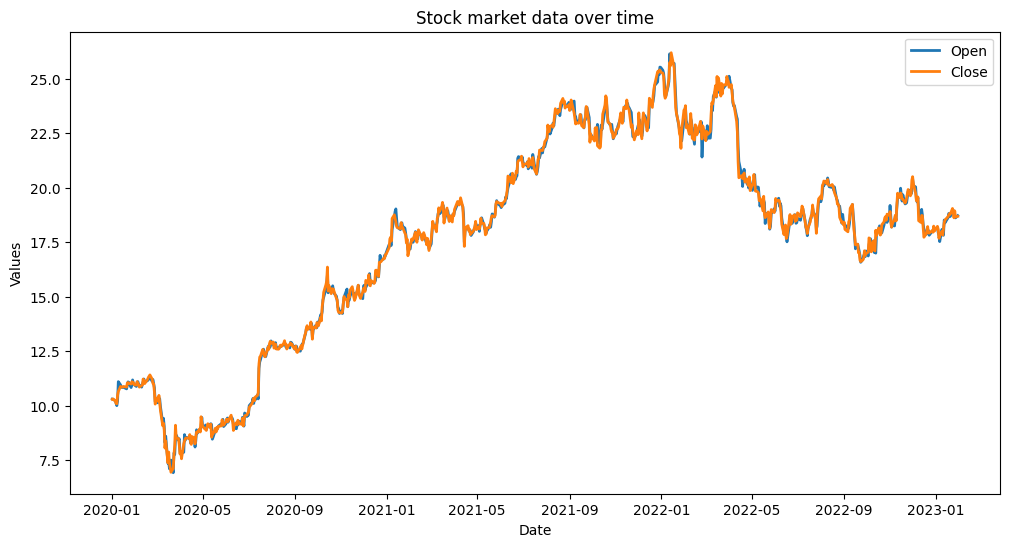

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data['Open'], label='Open', linewidth=2)
plt.plot(data['Close'], label='Close', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock market data over time')
plt.legend()


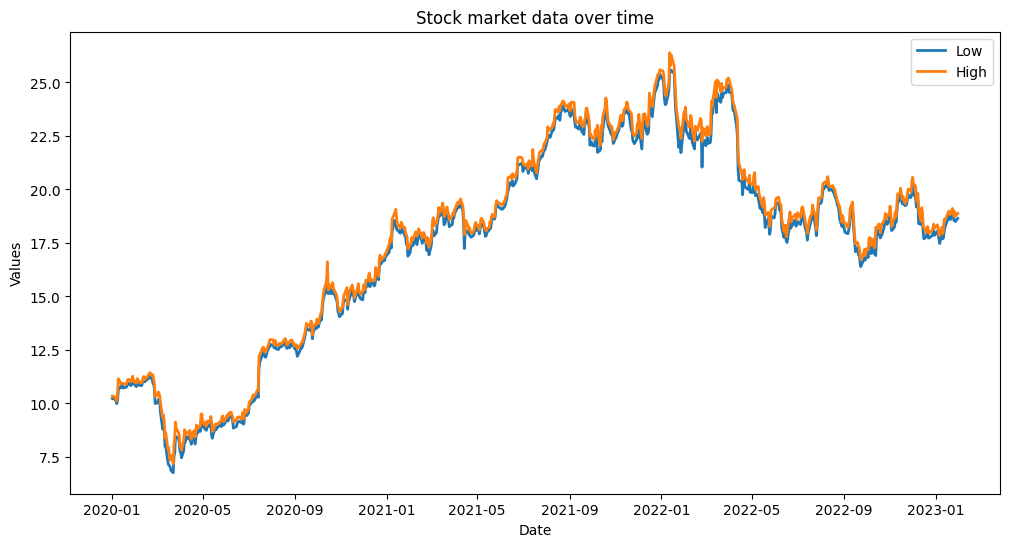

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['Low'], label='Low', linewidth=2)
plt.plot(data['High'], label='High', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock market data over time')
plt.legend()

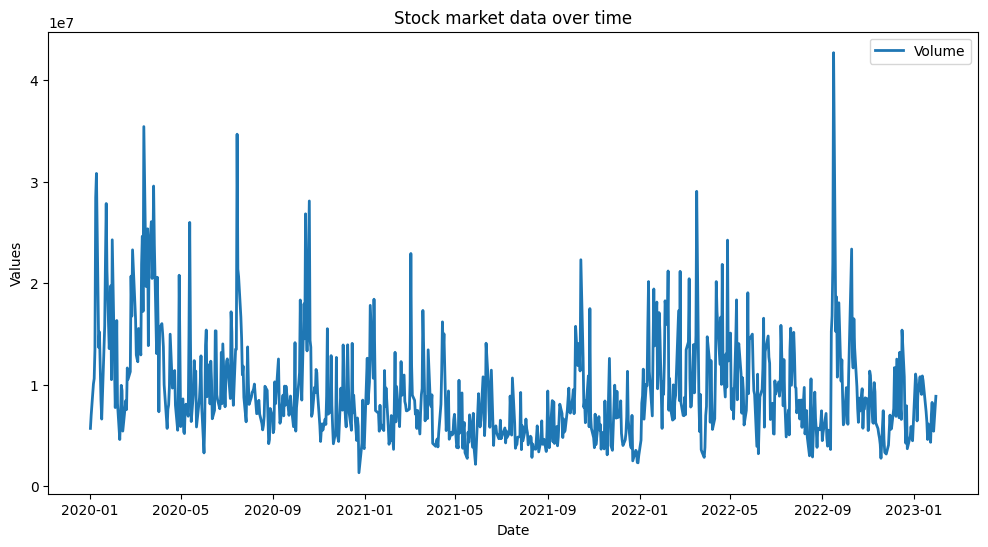

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['Volume'], label='Volume', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock market data over time')
plt.legend()

In [13]:
data.shape

(775, 6)

In [14]:
X = data[['Open', 'Low', 'High', 'Volume']]
y = data['Close']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape (620, 4)
X_test shape (155, 4)
y_train shape (620,)
y_test shape (155,)


In [15]:
X_train

,Open,Low,High,Volume
Date,,,,
2020-07-14,10.31,10.28,10.59,13468400
2022-12-28,18.05,17.92,18.19,5872100
2020-03-23,6.92,6.76,7.19,26046500
2021-08-11,22.84,22.82,22.99,2829800
2022-09-02,18.30,18.00,18.44,5248800
...,...,...,...,...
2020-04-15,8.28,8.25,8.46,8004400
2020-06-04,9.24,9.18,9.39,15375600
2021-01-28,17.46,17.41,17.75,7877600


In [16]:
X_test

,Open,Low,High,Volume
Date,,,,
2021-09-14,23.04,22.96,23.14,3970300
2022-10-28,18.41,18.37,18.81,8698000
2021-04-20,18.07,17.90,18.11,6985200
2023-01-17,18.62,18.62,18.88,7344100
2021-06-09,19.50,19.50,19.70,4972800
...,...,...,...,...
2020-08-04,12.75,12.60,12.75,9241900
2021-04-23,17.81,17.77,17.96,4617800
2021-11-03,22.64,22.57,22.73,7089200


In [17]:
y_train

Date
2020-07-14    10.59
2022-12-28    17.96
2020-03-23     7.12
2021-08-11    22.99
2022-09-02    18.09
              ...  
2020-04-15     8.33
2020-06-04     9.27
2021-01-28    17.64
2021-09-23    23.73
2020-05-29     9.10
Name: Close, Length: 620, dtype: float64

In [18]:
y_test

Date
2021-09-14    23.01
2022-10-28    18.79
2021-04-20    18.03
2023-01-17    18.67
2021-06-09    19.66
              ...  
2020-08-04    12.64
2021-04-23    17.89
2021-11-03    22.71
2021-03-01    17.66
2022-04-07    23.82
Name: Close, Length: 155, dtype: float64

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#creates the svr model
svr_model = SVR(kernel = 'rbf', C=100, epsilon=0.1)


#train the model
svr_model.fit(X_train_scaled, y_train)


#make presictions on the test data
prediction = svr_model.predict(X_test_scaled)


#Evaluate the model
mse = mean_squared_error(y_test, prediction)
print(prediction)
print("Mean Squared Error:", mse)



[23.05224062 18.68505653 17.98381875 18.82467546 19.65283119 21.94378585
 19.76923616 15.03926991  9.16335632 23.56840219 18.59012389  8.85443676
 12.59760488  9.34105232 18.12566835 18.11516192 24.86319852  8.50836482
 18.40027505  8.31194742  8.86864519 24.14144871  9.17049136 19.56000682
 11.09666268 18.133298    8.72024591 12.75322438 23.27281082 18.40039656
 23.56126625 17.75554866 17.93196909 18.46431573 17.87942752 21.630044
 24.53289113 15.68810664 24.84912843 17.9521371  19.87717357 18.89409821
 19.30851909 22.08937182 20.55037777 20.20697772  8.93161199 19.29302048
 18.03843356 15.51342782 17.60002478 17.6539468  14.41223101 24.42807525
 23.77615655 19.24734749 22.51565521 18.10200886 11.02353767 21.03215443
 11.32350074 11.2338161  10.10225049 12.68673981 20.42155856 23.32790167
 21.38759234 18.68916544 18.06888352 22.32733467 22.73292303 21.22442731
 14.17369719 19.5039307  20.22917926 12.45370688 24.124972   22.42985012
 18.57664391  7.21683188 19.45620123 17.09564911 18.1

In [20]:
mae = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.09716957778888115


In [21]:
rrs = r2_score(y_test, prediction)
print("R2 score:", rrs)

R2 score: 0.9980486100133417


In [22]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


#defines the parameter for grid search 
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, .1, 0.2, 0.5]
}
svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
normal_pred = grid_search.fit(X_train_normalized, y_train)

best_params = grid_search.best_params_


#trains the model with the best parameter 
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_normalized, y_train)

prediction = best_svr_model.predict(X_test_normalized)


mse = mean_squared_error(y_test, prediction)


print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error: 0.01281046059476443


In [23]:
r2 = r2_score(y_test, prediction)
accuracy_percentage = r2 * 100

print("R-Squared (Accuracy) in Percentage:", accuracy_percentage)

R-Squared (Accuracy) in Percentage: 99.9433516102741


In [24]:
mae = mean_absolute_error(y_test, prediction)
print("MAE:", mae)

MAE: 0.0760428691021305


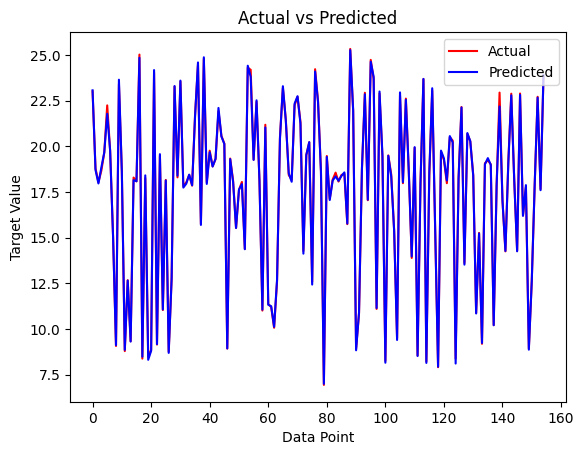

In [25]:
# Plot actual data
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Plot predictions
plt.plot(range(len(prediction)), prediction, color='blue', label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [26]:
new_data = pd.DataFrame()
new_data['Date'] = pd.to_datetime(data.index)
new_data = new_data.sort_values(by='Date')

# Extract the last date in the data
last_date = new_data['Date'].max()

# Generate dates for the next 30 days
next_30_days_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Create a DataFrame for the next 30 days data
next_30_days_data = pd.DataFrame({'Date': next_30_days_dates})

# Here you would typically engineer additional features based on your historical data
# For example, you might calculate moving averages, technical indicators, etc.
# For simplicity, let's assume a random feature 'Volume' for demonstration
# next_30_days_data['Volume'] = np.random.randint(100000, 500000, size=len(next_30_days_data))
next_30_days_data['Open'] = np.random.randint(0.583984, 26.150000, size=len(next_30_days_data))
next_30_days_data['Low'] = np.random.randint(0.583984, 25.580000, size=len(next_30_days_data))
next_30_days_data['High'] = np.random.randint(0.626953, 26.389999, size=len(next_30_days_data))
next_30_days_data['Volume'] = np.random.randint(3.360000e+05, 1.725120e+08, size=len(next_30_days_data))

next_30_days_data.set_index('Date', inplace=True)
# Print or use the prepared next 30 days data
print(next_30_days_data)


            Open  Low  High     Volume
Date                                  
2023-01-31     4   18     5   74399698
2023-02-01     3    3    13   86884759
2023-02-02     6    4    22   75979929
2023-02-03    11    6    22   37427399
2023-02-04    23   20     3  108901354
2023-02-05     3    9     8  165885921
2023-02-06    22    4    16  112022384
2023-02-07     8    1     1    8501802
2023-02-08     1    3     7   70932325
2023-02-09    18    5     5   88013401
2023-02-10    25   16     3   72125299
2023-02-11     7   16     6   26473403
2023-02-12    15   15     7   30975019
2023-02-13    18    0    17  166975736
2023-02-14    16    7    11   99826934
2023-02-15    17   21    13  123585357
2023-02-16     5   24    14  168259718
2023-02-17     1   14     5  163840930
2023-02-18    12    7    13  168590093
2023-02-19    21    3    15   45936545
2023-02-20     7    2     8    1330495
2023-02-21     3    5    11  109488492
2023-02-22    20    0    24   86530296
2023-02-23     5    3    

In [27]:
next_30_days_scaled = scaler.transform(next_30_days_data)

# Make predictions for the next 30 days
predictions_next_30_days = best_svr_model.predict(next_30_days_scaled)

# Print or use the predictions as needed
print(predictions_next_30_days)


[16.69579281 11.1283063  17.33963271 15.72477373  4.0288565  12.09164802
  1.705134   -3.67565557  7.57135706 -3.74539567 -0.68808164 13.83802967
  8.44980053  1.75460532  4.19274947 17.0601607  28.42724886 15.23426122
  8.45521743  0.75184666  3.57339494 11.17949706  6.197405    2.48866585
 22.1185359  14.07551764  9.0113643  18.10977043 15.78043548 22.8293548 ]


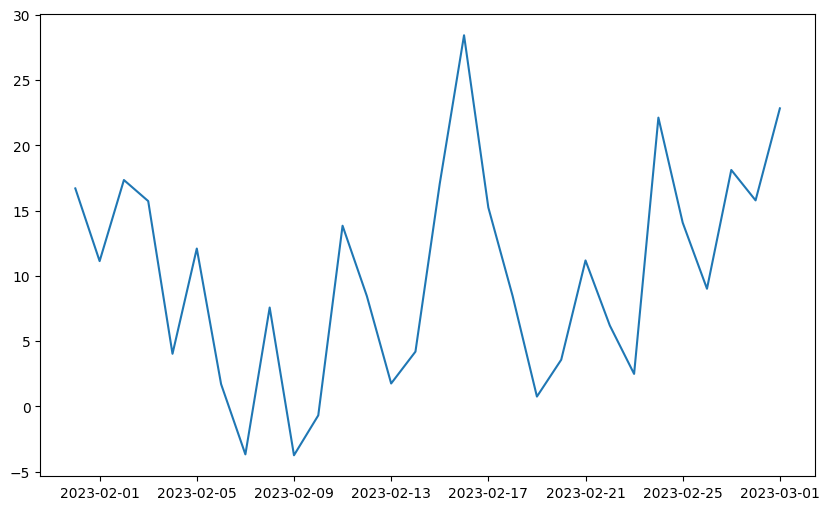

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(next_30_days_data.index, predictions_next_30_days)
# plt.plot()

In [55]:
original_close_data = pd.DataFrame()
original_close_data['Close'] = data['Close']
df = pd.DataFrame(predictions_next_30_days, index=next_30_days_data.index)
df.columns = ['Close']
# original_close_data
# df
predicted_30_days_data_combined = pd.concat([original_close_data, df])
predicted_30_days_data_combined

,Close
Date,
2020-01-02,10.290000
2020-01-03,10.310000
2020-01-06,10.210000
2020-01-07,10.100000
2020-01-08,10.090000
...,...
2023-02-25,14.075518
2023-02-26,9.011364
2023-02-27,18.109770


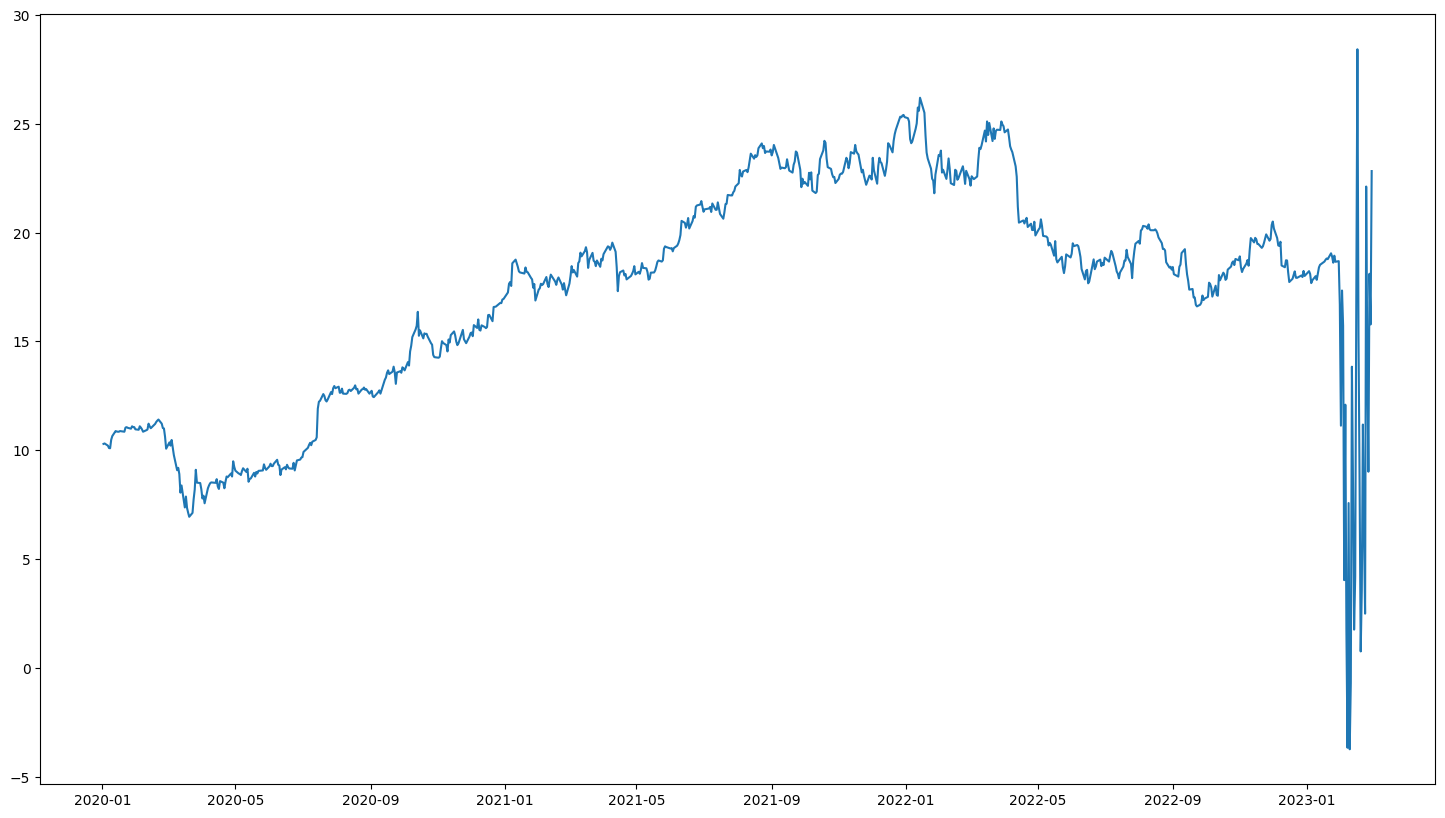

In [59]:
plt.figure(figsize=(18, 10))

plt.plot(predicted_30_days_data_combined.index, predicted_30_days_data_combined)
plt.show()

In [33]:
with open('svm.pkl', 'wb') as file:
    # pickle.dump(normal_pred, file)
    pickle.dump(best_svr_model, file)

In [34]:
with open('svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [78]:
data2 = yf.download('INFY', start='2021-02-01')
# sd=data2['Close']

[*********************100%%**********************]  1 of 1 completed


In [79]:
data2 = data2.drop(columns=['Adj Close', 'Volume'])
data2

,Open,High,Low,Close
Date,,,,
2021-02-01,17.190001,17.420000,17.049999,17.379999
2021-02-02,17.450001,17.510000,17.340000,17.440001
2021-02-03,17.600000,17.750000,17.490000,17.650000
2021-02-04,17.540001,17.639999,17.360001,17.590000
2021-02-05,17.500000,17.650000,17.389999,17.629999
...,...,...,...,...
2024-04-15,17.690001,17.709999,17.260000,17.270000
2024-04-16,16.980000,17.190001,16.980000,17.049999
2024-04-17,17.139999,17.180000,16.870001,16.950001


In [80]:
prediction = loaded_model.predict(data2)

c:\Users\Mehul\CODES\StockPrediction-Minor\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


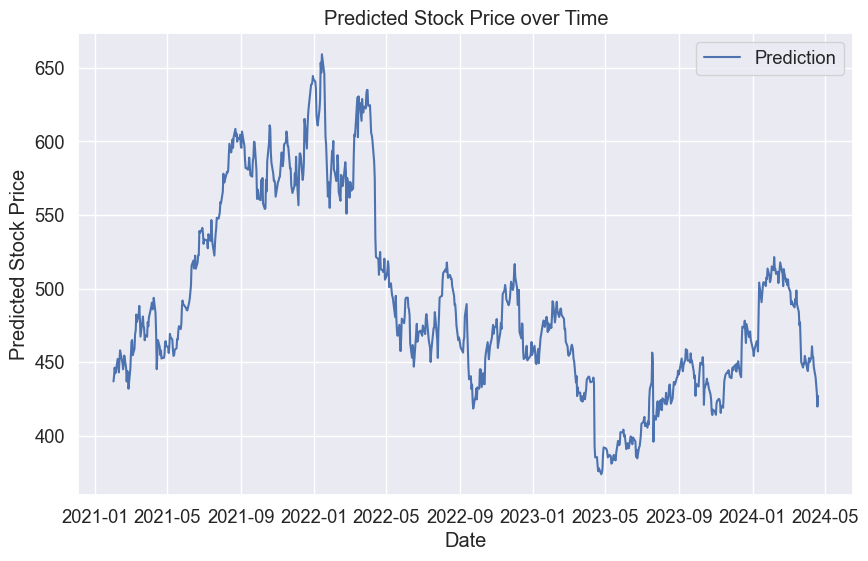

In [81]:
plt.figure(figsize=(10, 6))

plt.plot(data2.index, prediction, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.title('Predicted Stock Price over Time')
plt.legend()
plt.show()

In [82]:
data3 = yf.download('INFY', start='2021-02-01')
data3 = data3.drop(columns=['Adj Close', 'Volume'])
data3

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2021-02-01,17.190001,17.420000,17.049999,17.379999
2021-02-02,17.450001,17.510000,17.340000,17.440001
2021-02-03,17.600000,17.750000,17.490000,17.650000
2021-02-04,17.540001,17.639999,17.360001,17.590000
2021-02-05,17.500000,17.650000,17.389999,17.629999
...,...,...,...,...
2024-04-15,17.690001,17.709999,17.260000,17.270000
2024-04-16,16.980000,17.190001,16.980000,17.049999
2024-04-17,17.139999,17.180000,16.870001,16.950001


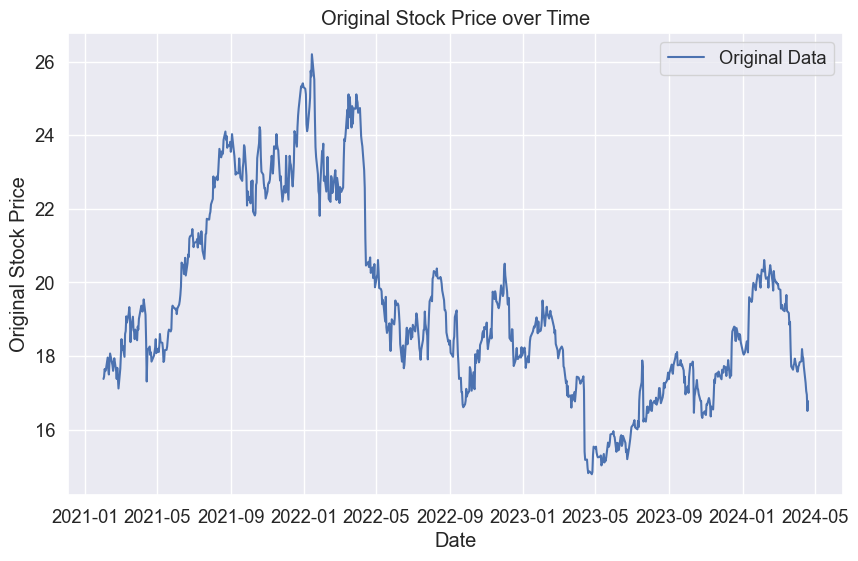

In [83]:
plt.figure(figsize=(10, 6))

plt.plot(data3.index, data3['Close'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Original Stock Price')
plt.title('Original Stock Price over Time')
plt.legend()
plt.show()

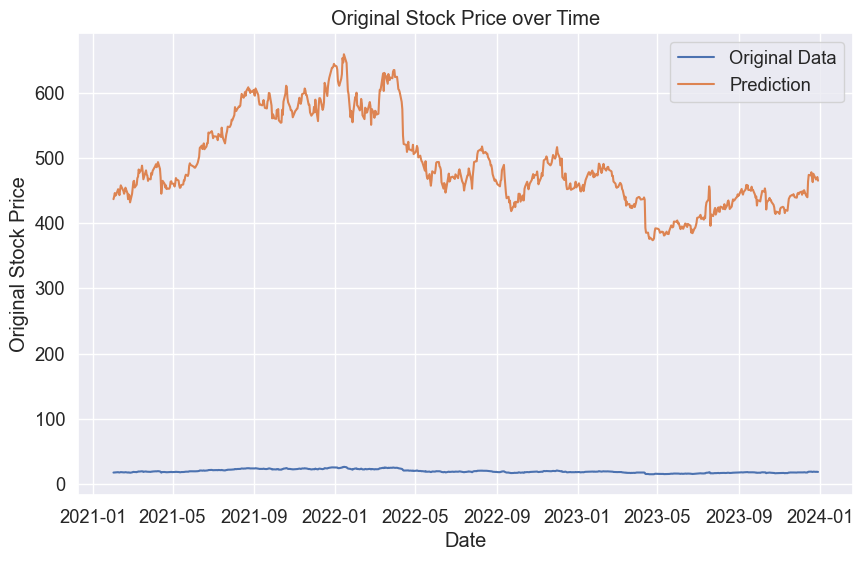

In [73]:
plt.figure(figsize=(10, 6))

plt.plot(data3.index, data3['Close'], label='Original Data')
plt.plot(data3.index, prediction, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Original Stock Price')
plt.title('Original Stock Price over Time')
plt.legend()
plt.show()